# 2025年度　AI概論　期末試験問題 回答

## 学籍番号　氏名
### 提出日　令和7年2月4日

# 【機械学習：近未来予測】時間ごとの気温変動予測
#### 学習の流れ
1. データセット（CSVデータ）をインポートする
2. CSVデータの読み込み（機械学習に必要なデータの読み込み）
3. 説明変数X（計測データ）と目的変数y（教師データ)を用意する
4. 訓練データとテストデータに分ける
5. 訓練データを用いて回帰モデルを作成
6. テストデータを回帰モデルに当てはめて予測を実施
7. 誤差の結果表示（実際の価格と予測した価格の差を表示）
8. Matplotlib によるグラフ表示（実際の価格と予測した価格変化をグラフで比較）

## 問題1-1. 必要なモジュールの読み込み

CSVデータの読み込みに必要なPandasをインポートし、1時間ごとの気温のデータが入った
temperature20230208.csvのデータをtemp_dataに読み込む。

In [1]:
#問題1-1のプログラム
import pandas as pd
temp_data = pd.read_csv("temperature20230208.csv")

## 問題1-2. temp_dataが読み込めているかを確認するため、最初の10行を表示してみましょう。

In [2]:
#問題1-2のプログラム
#最初の10行を表示
temp_data.head(10)

,年月日時,気温
0,2020/4/1 1:00,9.4
1,2020/4/1 2:00,9.3
2,2020/4/1 3:00,9.5
3,2020/4/1 4:00,9.5
4,2020/4/1 5:00,9.6
5,2020/4/1 6:00,9.8
6,2020/4/1 7:00,9.8
7,2020/4/1 8:00,10.2
8,2020/4/1 9:00,10.7
9,2020/4/1 10:00,11.3


## 問題1-3. 最後の10行を表示してみましょう。

In [3]:
#問題1-3のプログラム
#最後の10行を表示
temp_data.tail(10)

,年月日時,気温
711,2020/4/30 16:00,23.2
712,2020/4/30 17:00,22.0
713,2020/4/30 18:00,20.3
714,2020/4/30 19:00,19.8
715,2020/4/30 20:00,19.2
716,2020/4/30 21:00,18.5
717,2020/4/30 22:00,17.9
718,2020/4/30 23:00,17.6
719,2020/5/1 0:00,17.4
720,2020/5/1 1:00,17.2


## 問題１-4. 何行何列のデータであるか調べましょう。　ヒント：shape

In [4]:
#問題1-4のプログラム
temp_data.shape

(721, 2)

## 問題1-5. 学習に必要な説明変数　X（計測データ）と目的変数y （教師データ）を用意しましょう。すべてのデータを用いましょう。


### X にはある年月日時の気温、y は その１時間の時間の 気温 と対応させましょう。
### つまり、「ある時間の 気温 が X なら、その1 時間後の気温は y になる」という形で訓練データ（説明変数）と教師データ（目的変数）を設定します。

In [5]:
#問題1-5のプログラム
X = temp_data.loc[0:719, ["気温"]]
#X は ある時間の気温、y は その１時間後の 気温とします。
y = temp_data.loc[1:720, ["気温"]]

## 問題1-6. Xの最初の10行を表示しましょう

In [6]:
#問題1-6のプログラム
#最初の10行を表示
X.head(10)

,気温
0,9.4
1,9.3
2,9.5
3,9.5
4,9.6
5,9.8
6,9.8
7,10.2
8,10.7
9,11.3


## 問題1-7. Xの最後の10行を表示しましょう

In [7]:
#問題1-7のプログラム
X.tail(10)

,気温
710,24.5
711,23.2
712,22.0
713,20.3
714,19.8
715,19.2
716,18.5
717,17.9
718,17.6
719,17.4


##  問題1-8. ｙの最初の10行を表示しましょう

In [8]:
#問題1-8のプログラム
y.head(10)

,気温
1,9.3
2,9.5
3,9.5
4,9.6
5,9.8
6,9.8
7,10.2
8,10.7
9,11.3
10,11.8


##  問題1-9. ｙの最後の10行を表示しましょう

In [9]:
#問題1-9のプログラム
y.tail(10)

,気温
711,23.2
712,22.0
713,20.3
714,19.8
715,19.2
716,18.5
717,17.9
718,17.6
719,17.4
720,17.2


## 訓練データとテストデータに分ける

##  問題1-10. X と y を訓練データとテストデータに分て、 X_train, X_test, y_train, y_test の配列 4 つを作成します。先頭 600件を訓練データ、後ろの120件をテストデータとしましょう。

X と y は Pandas の二次元配列形式（DataFrame）であるため、NumPy の配列形式（ndarray）に変換する必要があります

In [10]:
#問題1-10のプログラム
import numpy as np
X_train = np.array(X[:600])
X_test = np.array(X[600:])
y_train = np.array(y[:600])
y_test = np.array(y[600:])

##   問題1-11. X_train、y_train、X_test、y_testの行数、列数を確認しましょう。

In [11]:
#問題1-11のプログラム
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(600, 1)
(600, 1)
(120, 1)
(120, 1)


## 訓練データを用いて回帰モデルを作成する
scikit-learn(サイキットラーン)とは、Pythonのオープンソース機械学習ライブラリで、機械学習のアルゴリズムを幅広くサポートしています。

##  問題1-12. scikit-learn（sklearn）のLinearRegression クラスを利用して線形回帰モデルを作成しましょう。コンストラクタを実行して訓練データを fit() する流れは、機械学習に共通です。

In [12]:
#問題1-12のプログラム
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

##  問題1-13. テストデータを回帰モデルに当てはめて予測しましょう。
## 予測結果はy_predに入れます。

In [13]:
#問題1-13のプログラム
y_pred = model.predict(X_test)

##  問題1-14. 予測結果を表示しましょう。

In [14]:
#問題1-14のプログラム
y_pred

array([[11.34188305],
       [11.24588543],
       [10.66989973],
       [ 9.22993547],
       [ 8.46195453],
       [10.28590926],
       [12.78184731],
       [15.18178774],
       [19.50168051],
       [21.70962571],
       [22.86159711],
       [23.3415852 ],
       [24.39755899],
       [23.72557567],
       [23.62957805],
       [22.47760664],
       [21.03764239],
       [20.07766621],
       [19.02169242],
       [18.92569481],
       [18.54170434],
       [17.96571864],
       [16.04576629],
       [14.9897925 ],
       [14.02981633],
       [13.26183539],
       [12.58985207],
       [12.10986399],
       [11.53387828],
       [12.39785684],
       [13.54982824],
       [14.70179965],
       [14.79779727],
       [14.9897925 ],
       [15.94976867],
       [15.85377106],
       [15.85377106],
       [12.49385446],
       [12.78184731],
       [11.82187114],
       [11.24588543],
       [11.0538902 ],
       [10.86189496],
       [10.57390211],
       [10.57390211],
       [ 9

##  問題1-15. 実際の値（正解） も出力してみましょう

In [15]:
#問題1-15のプログラム
print(y_test)

[[11.2]
 [10.6]
 [ 9.1]
 [ 8.3]
 [10.2]
 [12.8]
 [15.3]
 [19.8]
 [22.1]
 [23.3]
 [23.8]
 [24.9]
 [24.2]
 [24.1]
 [22.9]
 [21.4]
 [20.4]
 [19.3]
 [19.2]
 [18.8]
 [18.2]
 [16.2]
 [15.1]
 [14.1]
 [13.3]
 [12.6]
 [12.1]
 [11.5]
 [12.4]
 [13.6]
 [14.8]
 [14.9]
 [15.1]
 [16.1]
 [16. ]
 [16. ]
 [12.5]
 [12.8]
 [11.8]
 [11.2]
 [11. ]
 [10.8]
 [10.5]
 [10.5]
 [ 9.8]
 [ 9.5]
 [ 9.5]
 [ 8.9]
 [ 9.8]
 [ 9.4]
 [ 8.9]
 [ 8.7]
 [ 9.6]
 [11.2]
 [12.3]
 [13.2]
 [15.3]
 [16.9]
 [17.1]
 [16.7]
 [12.8]
 [12.4]
 [12. ]
 [14.1]
 [12.9]
 [13.2]
 [12. ]
 [13. ]
 [12. ]
 [11.4]
 [11. ]
 [11.1]
 [11.3]
 [10.8]
 [ 9. ]
 [ 8.6]
 [ 9.7]
 [12.2]
 [14.4]
 [16.6]
 [18.7]
 [19.4]
 [21.3]
 [20.8]
 [21.8]
 [21.9]
 [20.8]
 [19.9]
 [19. ]
 [17. ]
 [15.7]
 [14.7]
 [14. ]
 [14. ]
 [14.1]
 [12.7]
 [13.6]
 [12.8]
 [12.2]
 [12.2]
 [13.5]
 [15.3]
 [16.8]
 [17.9]
 [19.9]
 [21. ]
 [22.1]
 [22.9]
 [23.8]
 [24.5]
 [23.2]
 [22. ]
 [20.3]
 [19.8]
 [19.2]
 [18.5]
 [17.9]
 [17.6]
 [17.4]
 [17.2]]


##  問題1-16. 実際の値と予測値の差を出力しましょう

In [16]:
#問題1-16のプログラム
print( (y_test-y_pred)/y_test )

[[-1.26681294e-02]
 [-6.09325880e-02]
 [-1.72516454e-01]
 [-1.12040418e-01]
 [ 1.70396614e-01]
 [ 1.96413339e-01]
 [ 1.64585143e-01]
 [ 2.33243044e-01]
 [ 1.17571018e-01]
 [ 6.82564075e-02]
 [ 3.94286928e-02]
 [ 6.25869399e-02]
 [-8.16359449e-03]
 [ 1.55362794e-02]
 [-3.18593035e-02]
 [-5.03554506e-02]
 [-3.12569797e-02]
 [-4.02935862e-02]
 [ 9.28685290e-03]
 [-6.68589400e-03]
 [-1.87749637e-02]
 [-1.08994977e-01]
 [-6.26335293e-02]
 [-6.31058513e-02]
 [-5.48734083e-02]
 [-5.25266185e-02]
 [-4.04836424e-02]
 [-5.30316511e-02]
 [ 6.98485255e-02]
 [ 8.83928795e-02]
 [ 8.44710645e-02]
 [ 1.33020368e-02]
 [ 2.00134259e-02]
 [ 6.89569874e-02]
 [ 3.13945784e-03]
 [ 9.13930891e-03]
 [-2.68301685e-01]
 [ 2.39176206e-02]
 [-8.32073989e-02]
 [-5.55242085e-02]
 [-2.23532211e-02]
 [-2.35083517e-02]
 [-3.44661870e-02]
 [-7.03829641e-03]
 [-7.89696033e-02]
 [-4.23072413e-02]
 [-1.19922043e-02]
 [-8.02163978e-02]
 [ 7.77612003e-02]
 [-5.33956162e-02]
 [-6.94301487e-02]
 [-3.88437054e-02]
 [ 7.8547395

## Matplotlib を利用した可視化によるデータ分析
数値の並びだけを見ても予測の精度がわかりません。

##  問題1-17. 実際の値（y_test）と予測値（y_pred）の差のヒストグラムを表示してください

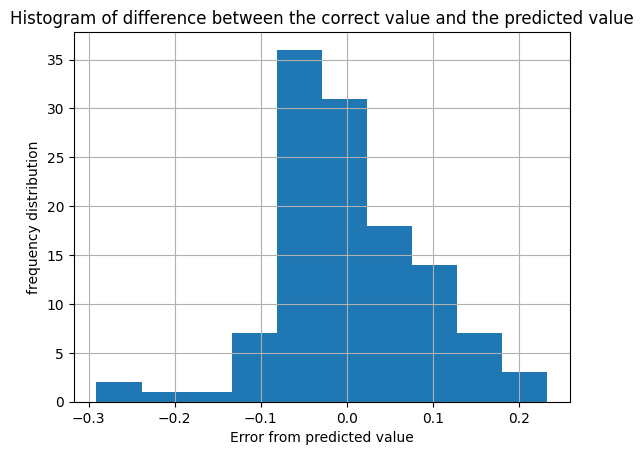

In [17]:
#問題1-17のプログラム
#matplotlibのインポート
import matplotlib.pyplot as plt

"""ここからコードを記述してください"""
plt.hist((y_test-y_pred)/y_test )
plt.xlabel('Error from predicted value')
plt.ylabel('frequency distribution')
plt.title("Histogram of difference between the correct value and the predicted value")
plt.grid(True)


##  問題1-18.  テストデータy_testと予測結果y_pred をの価格の推移がわかるグラフを描いてください。
以下、仕様です。
- テストデータは青色で表示（プロット plot）し、Actual temperatureというラベル（label）をつける。
- 予測値は赤色で表示（プロット plot）し、'Estimated temperature'というラベル（label）をつける。
- テストデータと予測値データのグラフは同じ領域に重ねて描いてください。
- グラフの右下に凡例を表示してください。
- 図のタイトルは"Atmospheric temperature (hourly change)"としてください。
- xラベルは "Hours", yラベルは"Temperature"とつけて表示してください。

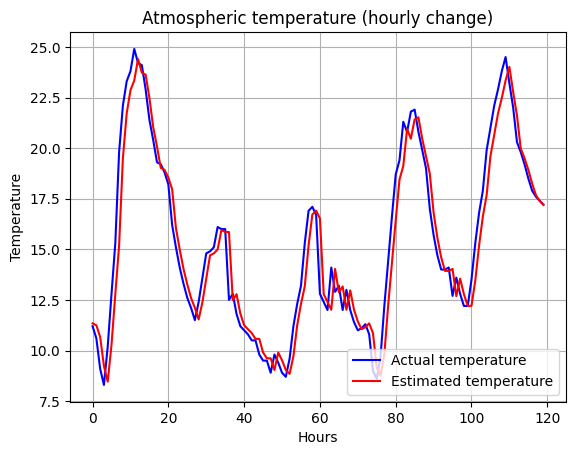

In [18]:
#問題1-18のプログラム
import matplotlib.pyplot as plt

"""ここからコードを記述してください"""

plt.plot(range(0,120), y_test, label="Actual temperature", color="blue")
plt.plot(range(0,120), y_pred, label="Estimated temperature", color="red")
plt.xlabel("Hours")
plt.ylabel("Temperature")
plt.title("Atmospheric temperature (hourly change)")
plt.grid(True)
plt.legend(loc = "lower right")


# 【機械学習：画像分類】

## 教師あり学習による画像分類　手書き数字（0と１と２）を分類する

### 学習に使うデータセットをインポートして計測データ(説明データ)と教師データ（目的データ）に分ける

学習の流れ
- データセット（手書き数字画像ファイル）をインポートする

Moodle（eラーニング）から、機械学習に必要な手書き数字の画像が入ったzip（圧縮）ファイルをダウンロードし、展開（解凍）してください。展開して表示された `num_photo012` フォルダをコピーします。
- 機械学習に必要なデータの読み込み
- 説明変数X（計測データ）と目的変数y（教師データ)を用意する
- 訓練データとテストデータに分ける
- 訓練データを用いて分類器を作成
- テストデータを分類器にかけて分類を実施
- 正解率を求める

##  問題2-1. 必要なライブラリ（モジュール）をインポートしましょう(実行)

In [19]:
#問題2-1のプログラム
import imageio #画像処理のライブラリ。
               #取り込んだ画像の情報（ピクセル単位）をndarray形式に変換
import numpy as np #読み込んだ画像データ（計測データ）を配列に読み込む
import matplotlib.pyplot as plt   #画像を表示するときに利用
from sklearn.metrics import accuracy_score    #モデルの正解率を計算する

## 参考：手書き数字「０」の一枚目の画像の計測データを出力した後、画像そのものを表示してみましょう。（実行のみ）
※今回は、縦28×横28ピクセルの白黒画像です。

(28, 28)
[[  0   0   0   0   0   0   0   0   0   1   0   0   0   2   0   2   0   2
    0   0   2   0   0   2   0   0   0   0]
 [  0   0   0   0   0   0   0   0   1   2   0   2   1   0   0   0   0   0
    0   0   2   0   1   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   4   0   2   0   1   2   3   0
    2   3   0   1   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   2   0   0   3   0   0   0
    2   0   0   2   2   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   1   0   2   1   0   3   0   0  66
  251 255  65   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   3   0   0   0   2   0   0  97 204
  251 255 200 112   6   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   1   0   4   0   0   1   1  95 187 253
  248 254 251 254  28   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   1   0   0   0  16  62 224 245 251 250
  213 212 251 252  31   0   0   0   0   0]
 [  2   0   1   0   0   1   3   0   0   2   0  78 182 2

/var/folders/46/7xdkxrqn4bv0clhjnt9pjbdc0000gn/T/ipykernel_39933/1766239561.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  num0=imageio.imread(f"num_photo012/num0/001.jpg")


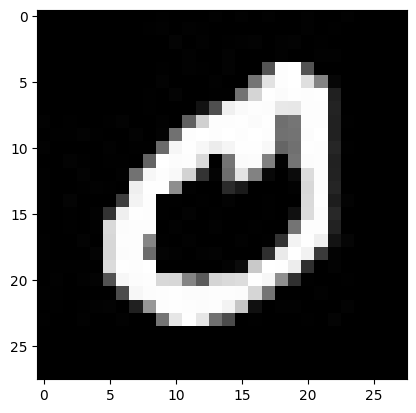

In [20]:
num0=imageio.imread(f"num_photo012/num0/001.jpg")
fig=plt.figure()
sp=fig.add_subplot(1,1,1)
sp.imshow(num0, cmap='Greys_r')# cmap='Greys_r'
print(num0.shape)
print(num0)

##  問題2-2. 数字「1」の一枚目の手書き画像の計測データを出力した後、画像そのものを表示してみましょう。

(28, 28)
[[  0   0   0   0   0   0   0   0   0   0   3   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   3   0   0   0   3   0   1   1   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   3   0   0   0   0   1   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   2   0   4   0   2   0   2   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   1   0   1 141 255 211  31   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   4   0  31 241 254 251  70   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   2   0   0   9 172 253 254  72   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   2   0 146 254 249  72   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   1   2  13 193 2

/var/folders/46/7xdkxrqn4bv0clhjnt9pjbdc0000gn/T/ipykernel_39933/2237191289.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  num0=imageio.imread(f"num_photo012/num1/001.jpg")


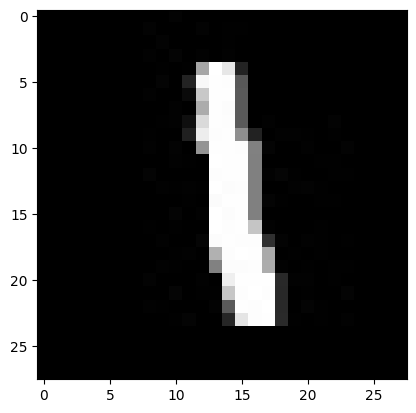

In [21]:
#問題2-2のプログラム
num0=imageio.imread(f"num_photo012/num1/001.jpg")
fig=plt.figure()
sp=fig.add_subplot(1,1,1)
sp.imshow(num0, cmap='Greys_r')# cmap='Greys_r'
print(num0.shape)
print(num0)

## 問題2-3. 説明変数Xと目的変数yを入れるための空の配列（計測データ X と教師データ y）を用意する 
### ＜注意＞PHOTO＿SIZEがいくつになるか考えてください。

In [22]:
# 問題2-3のプログラム
PHOTO_SIZE =28*28*1
# 空の配列（計測データ X と教師データ y）を用意する
X = np.empty((0, PHOTO_SIZE), np.uint8)
    # uint8とは8ビットで表現できる符号なし整数
y = np.empty(0, np.uint8)

## 問題2-4. 説明変数Xと目的変数yを出力し、最初、空であることを確認しましょう

In [23]:
#問題2-4のプログラム
print(X)
print(y)

[]
[]


## Xに機械学習に必要な計測データ、yに教師データを読み込みます。
## 問題2-5. 0,1,2,0,1,2・・・・と順に画像データを読み込むよう追記しましょう

/var/folders/46/7xdkxrqn4bv0clhjnt9pjbdc0000gn/T/ipykernel_39933/1922147591.py:15: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  p1 =imageio.imread(f"num_photo012/num0/{i:03d}.jpg").reshape(1, PHOTO_SIZE)
/var/folders/46/7xdkxrqn4bv0clhjnt9pjbdc0000gn/T/ipykernel_39933/1922147591.py:19: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  p1 =imageio.imread(f"num_photo012/num1/{i:03d}.jpg").reshape(1, PHOTO_SIZE)
/var/folders/46/7xdkxrqn4bv0clhjnt9pjbdc0000gn/T/ipykernel_39933/1922147591.py:23: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of

[0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0
 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1
 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2
 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0
 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1
 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2
 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0
 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1
 2 0 1 2]


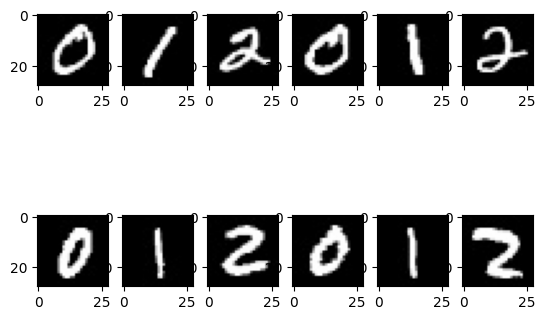

In [25]:
#問題2-5のプログラム
# 空の配列（計測データ X と教師データ y）を用意する
X = np.empty((0, PHOTO_SIZE), np.uint8)
# uint8とは8ビットで表現できる符号なし整数
y = np.empty(0, np.uint8)

# 画像を読み込むには imageio.imread() を使う
# 手書きの画像（計測データ）を配列形式で読み込んでXに格納
#（axis = 0で二次元配列の縦（行）に要素を追加する）
# 目的変数y には 0 なら 0, 1 なら 1 、２なら２と整数値0から２（8ビット符号なし整数）のデータを
# 教師データとして追加していく


for i in range(0, 100):
    p1 =imageio.imread(f"num_photo012/num0/{i:03d}.jpg").reshape(1, PHOTO_SIZE)
    X = np.append(X, p1, axis = 0)
    y = np.append(y, np.array([0], dtype = np.uint8))

    p1 =imageio.imread(f"num_photo012/num1/{i:03d}.jpg").reshape(1, PHOTO_SIZE)
    X = np.append(X, p1, axis = 0)
    y = np.append(y, np.array([1], dtype = np.uint8))

    p1 =imageio.imread(f"num_photo012/num2/{i:03d}.jpg").reshape(1, PHOTO_SIZE)
    X = np.append(X, p1, axis = 0)
    y = np.append(y, np.array([2], dtype = np.uint8))

print(y)

# matplotlib.pyplot の plt.imshow() を実行することで、
#グラフと同じような形式で画像を表示できます。
fig=plt.figure()
for i,j in enumerate(X[:12]):
    sp=fig.add_subplot(2,6,(i+1))
    sp.imshow(j.reshape(28,28), cmap='Greys_r')

## 問題2-6. `X` と `y` の要素数を確認してみましょう

In [26]:
#問題2-6のプログラム
# Xおよびyの要素数を確認する（命令を追記すること）
print(X.shape)
print(y.shape)

(300, 784)
(300,)


## データを訓練データとテストデータに分ける

## 問題2-7. 訓練データとテストデータを各々240件目で分けましょう。

In [27]:
#問題2-7のプログラム
X_train = X[:240]
X_test  = X[240:]
y_train = y[:240]
y_test  = y[240:]

## 問題2-8. `X` と `y` 各々の訓練データとテストデータの要素数を確認してみましょう

In [28]:
#問題2-8のプログラム
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(240, 784)
(60, 784)
(240,)
(60,)


## 問題2-9. SVM の分類器を作ってみましょう
### 数字「０」ならば 0、「１」ならば 1、「２」ならば 2  として、三つのクラスに分ける線形SVMによる３値分類を行う。

In [29]:
#問題2-9のプログラム
# 線形分類器を作成する。訓練データを設定する（命令を追記すること）
#　分類できるようにするため学習用（訓練用）の画像で学習する。
from sklearn.svm import SVC
classifier = SVC(kernel = "linear")
classifier.fit(X_train,y_train )

SVC(kernel='linear')

##  問題2-10. テストデータを分類器にかけて分類してみましょう

### テストデータを分類器にかけてください。学習に用いた画像とは異なるテスト用の画像で分類（予測）してください

In [30]:
#問題2-10のプログラム
## テストデータを分類器にかける（命令を追記すること）
y_pred = classifier.predict(X_test)

## 問題2-11. 画像分類（０と１と２）の予測結果を表示しましょう

分類器が出力した結果を表示しましょう。

In [31]:
#問題2-11のプログラム
# 分類器の出力結果を表示する（命令を追記すること）
print(y_pred)

[0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0
 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 1 0 1 2 0 1 2]


## 問題2-12. 分類器が出力した結果と比較するため、正解も表示しましょう。

In [32]:
#問題2-12のプログラム
# 正解を表示する（命令を追記すること）
print(y_test)

[0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0
 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2]


## 問題2-13. 混同行列を表示してみましょう

In [33]:
#問題2-13のプログラム
# 混同行列を表示する（命令を追記すること）
from sklearn import metrics
print(metrics.confusion_matrix(y_test, y_pred))

[[20  0  0]
 [ 0 20  0]
 [ 0  1 19]]


## 問題2-14. 上の問題2-13の混同行列の結果から具体的に何がわかるか。説明せよ

### ＜問題２－１4の解答欄＞自分の言葉で説明してください。
### 
### 

## 問題2-15. 適合率・再現率・F値を確認してみましょう
- precision(適合率):TP/（TP+FP）正と予測したデータのうち、実際に正であるものの割合
- recall（再現率): TP/（TP+FN）実際に正であるデータのうち、正と予測されたものの割合
- f1-score（f値）：２/（１/適合率＋１/ 再現率）適合率と再現率の調和平均

In [34]:
#問題2－15のプログラム
#適合率・再現率・F値の表示
print(metrics.classification_report(y_test ,y_pred  ))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.95      1.00      0.98        20
           2       1.00      0.95      0.97        20

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



## 問題2-16.上の問題2-15の出力結果から具体的に何がわかるか。説明せよ。

### ＜問題2-16 の解答欄＞自分の言葉で説明してください。
### 
### 

## 問題2-17. accuracy_scoreを表示しましょう

In [35]:
#問題2-17のプログラム７
accuracy_score(y_test ,y_pred  )

0.9833333333333333

## 問題2-18. 上の問題2-17 の出力結果から具体的に何がわかるか。説明せよ

### ＜問題2-18の解答欄＞自分の言葉で説明してください。
### 
### 

# 【プログラミング演習】


## 問題3-1. 球の半径rを5として、体積vを求めて出力しましょう。ただし、表面積は以下の公式でもとめられる。また、円周率π（PAI）は3.141592として計算しなさい。
### $$v=4/3×π×r^3$$
### 実行する際は、半径は10と入力した場合の結果を示すこと

In [36]:
#問題3-1のプログラム
PAI=3.141592
r=5
v=4/3*PAI*r**3
print(v)


523.5986666666666


## 問題3-2. for文を用いて、0以上100以下の2の倍数の合計suｍを出力しなさい。
## ヒント：sum=2+4+・・・・・・+100

In [37]:
#問題3-2のプログラム
sum=0
for i in range(2,101,2):
    sum+=i
print(sum)

2550


## 問題3-3. for文の2重ルールを用いて、以下の三角形を出力するプログラムを作成しなさい。
### ※＋を1個ずつ増やしながら、5行出力する。
### ただし、ヒント1,　ヒント２のプログラムを実行し、参考にすることができる。
### 問題３－３のプログラムは下の該当するセルに作成し、実行すること。
###### ＋
###### ＋＋
###### ＋＋＋
###### ＋＋＋＋
###### ＋＋＋＋＋

In [38]:
#ヒント1
for i in range(0,5,1):
    print("+",end="")

+++++

In [39]:
#ヒント2
for i in range(0,5,1):
    for j in range(0,3,1):
        print("+",end="")
    print()

+++
+++
+++
+++
+++


In [40]:
#問題3-3のプログラム
for i in range(1,6,1):
    for j in range(0,i,1):
        print("+",end='')
    print()


+
++
+++
++++
+++++


## 問題3-4. 以下のの身長（height）と体重（weight）のデータから、numpy の最小二乗法により、体重と身長の近似直線式を求めなさい。

### height = np.array([162, 150, 158, 170, 172, 181, 165, 158, 169, 175])
### weight = np.array([55, 50, 60, 70, 64, 76, 59, 62, 67, 71])

###  numpyのpolyfit を用いて、近似直線の傾きと切片を表示しなさい。また、poly1dにより、 f(x:weight) の式形式で表示しなさい。


In [41]:
#問題3-4のプログラム
height = np.array([162, 150, 158, 170, 172, 181, 165, 158, 169, 175])
weight = np.array([55, 50, 60, 70, 64, 76, 59, 62, 67, 71])
p = np.polyfit(weight, height, 1)
# 一次関数の式のオブジェクトを生成する
print(p)
# 一次関数の式のオブジェクトを生成する
f = np.poly1d(p)
print(f)


[ 1.05859094 98.88533429]
 
1.059 x + 98.89


## 問題3-5.（問題3-4.の続き）
### 上の身長（height）と体重（weight）のデータを利用して、身長 と体重の関係がわかる散布図グラフを描いてください。以下、仕様です。

- 散布図は青色でプロットしてください。
- 最小二乗法を利用して、このデータの近似直線を散布図と一緒に描いてください。
- 近似直線は赤色にしてください。
- グラフの右下に凡例を表示してください。表示する文字列は、散布図の方は「data」、近似直線の方は「lsm」としてください。
- 図のタイトルは"Relationship between height and weight"としてください。
- xラベルは weight , yラベルはheightとつけて表示してください。

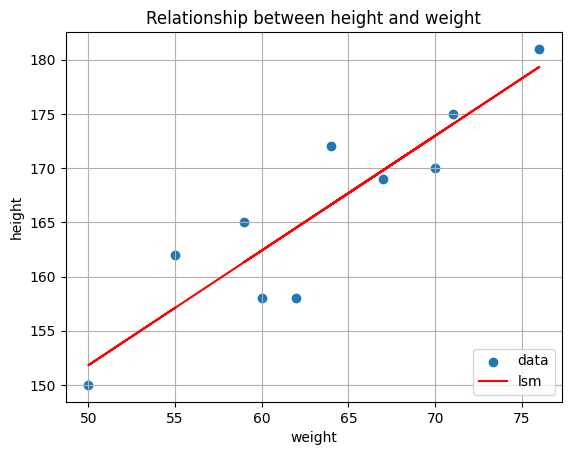

In [42]:
#問題3-5のプログラム
plt.scatter(weight, height,label = "data")
plt.plot(weight, f(weight),color="r",label="lsm")
plt.legend(loc = "lower right")
plt.title("Relationship between height and weight")
plt.xlabel("weight")
plt.ylabel("height")
plt.grid(True)